# Project : Accidental Drug Related Deaths

##  Project Proposal :

Data Set Description : 
A listing of each accidental death associated with drug overdose in Connecticut from 2012 to 2018. A "Y" value under 
the different substance columns indicates that particular substance was detected.
Data are derived from an investigation by the Office of the Chief Medical Examiner which includes the toxicity report, death certificate, as well as a scene investigation.

Project proposal includes data source location

Data Source Loacation : 

During Project 1 I came to know about Data.Gov website. I am using asame website for project 2. 
1. Search for Data.gov in google
2. Click on Data Tab on the top 
3. From the results select 'Accidental Drug Related Deaths 2012-2018  177 recent views' which will navigate to this link       https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015.
4. Then click on CSV download to download the data set. 

Note : This Data Set has mutiple formats but I have taken csv format.


Describe how data source was discovered ? 
I googled 'Data.Gov' and then I clicked on the Data tab. From the results I selected https://catalog.data.gov/dataset/accidental-drug-related-deaths-january-2012-sept-2015.
I discovered this website during Project 1. 


EDA and Accessabiltiy:
Data is legally acessable and free to download but you might have to create account.
Documented EDA is not available. There is no visualization present. Only, Description of the data set is given in the website and in Kaggle.


Project proposal relevant to Data 601 objectives ? 
This Data set is totally related to the objectives we learnt in DATA 601. 
There is so much of scope for data cleaning, charecterization and visualization. 
Also, lots of hypothesis can be concluded by see this data Set. 

Does student understand the stories in the data?
I don't have any specific experience related to this csv file. But this csv delas with numbers and percentages of deaths. 
I have similar kind of experience, where I used to work on policy premiums data sets. 


Data Size : 
Columns: 41
Rows : 5106
Size : 1765 Kb or 1.7 Mb

Questions to be investigated :
Which drug is causing the more deaths ? 
Which gender has most of the deaths ? 

Hypothesis 1 : 
Most of the students are prone to drugs. So, after visulaization : teengaers(14 to 22) might have more deaths related to drugs when compared to normal age( > 22) groups. 

Hypothesis 2 : 
Since this data is related to Connecticut and from surveys I know that the white race is about 81.6 percent, Most of the deaths related to drugs will be from white race when 
compared to other races. 

In [1]:
# importing all the libraries required.
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import lag_plot
import random

In [2]:
# Loading the csv file into pandas data frame.
data = pd.read_csv('Accidental_Drug_Related_Deaths_2012-2018.csv')

### Data Cleaning :

Before working with any data, finding out the missing values is important. The below code describes the total count of Nan values present in each column of the data set.

The below code can be used to make cleaning decisions like
1. Which columns to drop. 
2. Which rows can be removed ?
3. Which rows can be replaced ?

In [3]:
# Finding out the total Nan value present in each column.
data.isnull().sum()

ID                        0
Date                      2
DateType                  2
Age                       3
Sex                       6
Race                     13
ResidenceCity           173
ResidenceCounty         797
ResidenceState         1549
DeathCity                 5
DeathCounty            1100
Location                 24
LocationifOther        4515
DescriptionofInjury     780
InjuryPlace              66
InjuryCity             1756
InjuryCounty           2741
InjuryState            3681
COD                       0
OtherSignifican        4936
Heroin                 2576
Cocaine                3584
Fentanyl               2873
FentanylAnalogue       4716
Oxycodone              4498
Oxymorphone            4997
Ethanol                3858
Hydrocodone            4987
Benzodiazepine         3762
Methadone              4631
Amphet                 4946
Tramad                 4975
Morphine_NotHeroin     5063
Hydromorphone          5080
Other                  4670
OpiateNOS           

Clearly from the above results, following setps can be taken 
1. Date Column has just 2 missing values and when compared to 5000 columns it can be dropped. 
2. Since Age is number, any random value can be filled as it has no pattern.
3. All the Drug column has values as Y which means Yes. So, the missing values indirectly mean 'No'.So instead of dropping them 
   all Nan values are replaced with N indicating as No.
4. All the irrelevant columns can be dropped.

In [4]:
# The data frame is modified. 
# notnull() removes the Nan values present in Date column
data = data[pd.notnull(data['Date'])]

In [5]:
# The missing values are filled with random integers. 
data['Age'].fillna(random.randint(16,56), inplace = True)

In [6]:
# Making sure that Age is always an integer. 
data['Age'] = data['Age'].astype('int')

In [7]:
# Making sure that Age column has no null values
data['Age'].isnull().sum()

0

In [8]:
# The data frame is modified. 
# notnull() removes the Nan values present in Race column
data = data[pd.notnull(data['Race'])]

In [9]:
# The data frame is modified. 
# notnull() removes the Nan values present in Sex Column
data = data[pd.notnull(data['Sex'])]

The data set has so many columns. The missing values in Drug columns mean something here. 
So, Instead of dropping them, they are replcaed. A person is identifed by a drug so he/she might eithr have it or not. This is the analysis I have found. 
So, I replaced all the missing values of Drug columns with N indicating as No. 

In [10]:
# drugNames is list which stores the drug column names of the data set. 
drugNames = list(data.columns[20:37])

In [11]:
# This for loop replaces the Nan values with N for all the drug columns. 
for drugColumn in drugNames:
    data[drugColumn].fillna('N', inplace=True)

In [12]:
data['OtherSignifican'].fillna('Not Specified', inplace = True)

Now that cleaning of the required data is done. Rest of the columns could be dropped. 
The columns starting from index 6  to 18 are dropped from the data set .
I.e Residence City to InjuryState COlumns of the data set are dropped.

In [13]:
# This list holds the names of columns which are to be dropped
dropColumns = list(data.columns[6:18])

In [14]:
# This lopp drops the columns 
for columnName in dropColumns:
    data = data.drop(columnName,axis = 1)

### Visualization and Validating the Proposed Questions :

Question 1 : Which gender has most of the deaths ? 

Result : For the gram, it is clearly depicted that Males have more number of deaths. 

To find the total number of death by gender, Sex column should be grouped.

In [15]:
# Data Frame is group by Gender column
genderGroup = data.groupby('Sex')

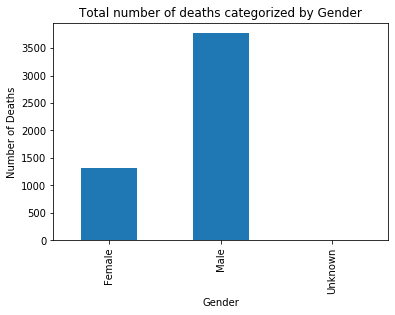

In [16]:
# Groupby variable holds the data frame by grouping Sex Column. Getting the count of it will answer the above question. 
# A bar graph is plotted to show the results. 
_ = genderGroup['Sex'].count().plot(kind = 'bar')
_ = plt.xlabel('Gender')
_ = plt.ylabel('Number of Deaths')
_ = plt.title('Total number of deaths categorized by Gender')

Question2 : Which drug is causing the more deaths ? 

Results : From the scatter plot, it displays that Heroin caused the most number of deaths

Since I know the drug types from the data set. Calculating total number of deaths from each drug column will answer this question. I.e. counting the total number of 'Y' in each drug column. 

A list is declared which will append total number of deaths categorized by type of drug.

In [17]:
# Declaring an empty list
totalValue = []

In [18]:
# This loop will pick the drug column name and iterates through dat frame. 
# The summation counter increments if the value of each cell is not N. 
for drug in drugNames:
    summation = 0
    for index , value in data.iterrows():
        if(data.at[index,drug] != 'N'):
            summation = summation + 1
    totalValue.append(summation)

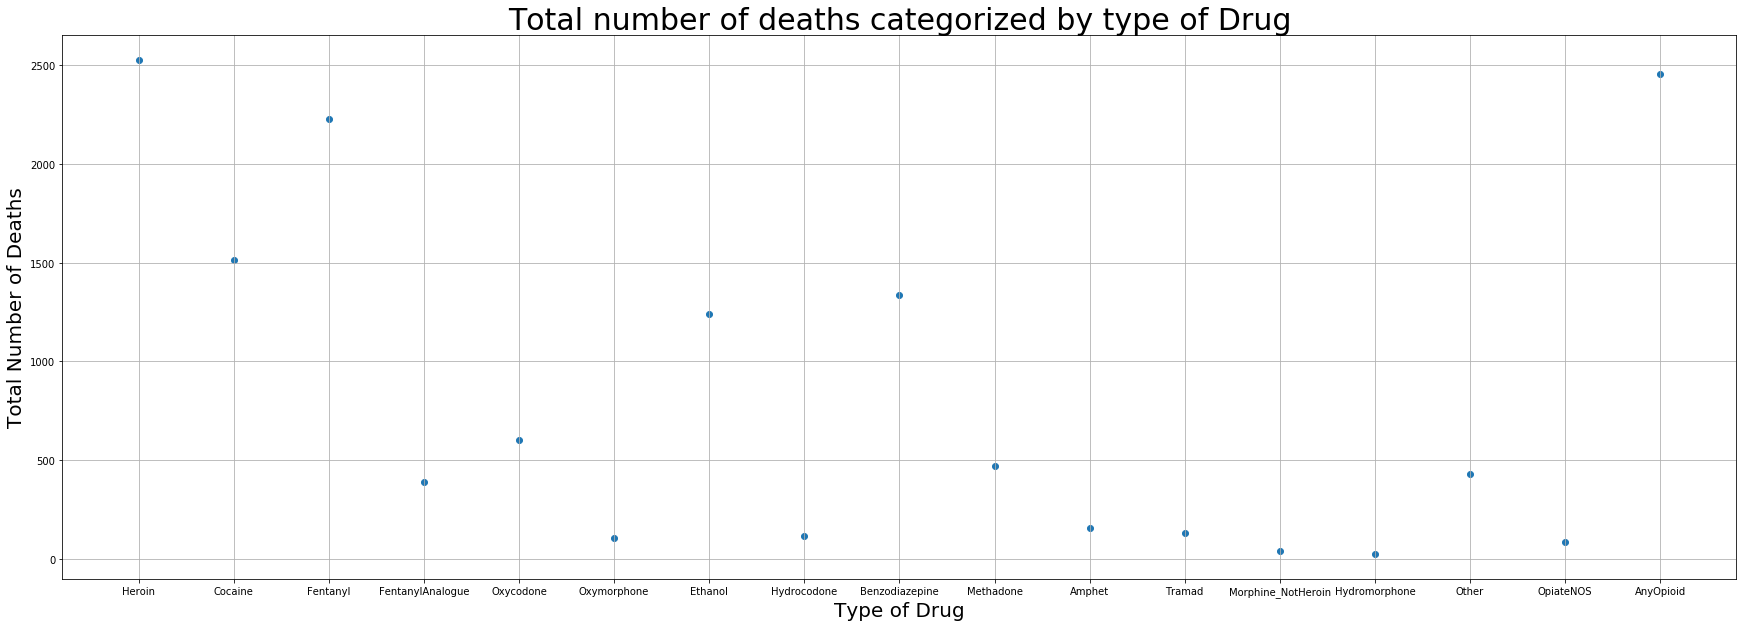

In [27]:
# Plotting the results on a scatter plot. 
_=plt.figure(figsize=(30, 10))
_=plt.scatter(drugNames,totalValue)
_ = plt.xlabel('Type of Drug',fontsize = 20)
_ = plt.ylabel('Total Number of Deaths',fontsize = 20)
_ = plt.title('Total number of deaths categorized by type of Drug', fontsize = 30)
_ =plt.grid(True)

## Hypothesis Validation : 

### Hypothesis 1 : True

Since this data is related to Connecticut and from surveys I know that the white race is about 81.6 percent, Most of the deaths related to drugs will be from white race when 
compared to other races. 

Programmatic Approach : 
1. Race column of the data set is grouped together. 
2. Count os Race column from the grouped variables is plotted on a bar graph. 

In [20]:
# Grouping the Race column
raceGroup = data.groupby('Race')

In [21]:
# This code displays the total number of deaths caused by drugs categorized by Race in connecticut
raceGroup['Race'].count()

Race
Asian Indian                14
Asian, Other                18
Black                      433
Chinese                      2
Hawaiian                     1
Hispanic, Black             24
Hispanic, White            560
Native American, Other       1
Other                       11
Unknown                     23
White                     4001
Name: Race, dtype: int64

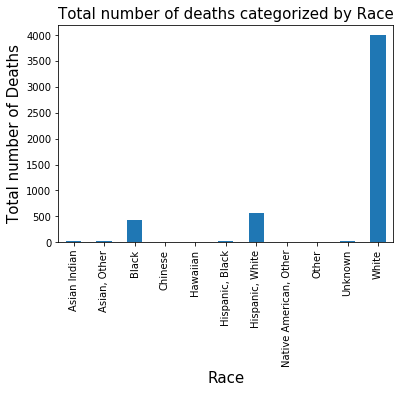

In [22]:
# Plotting the count of number of deaths from the grouped variable. 
_= plt.Figure(figsize = (50,30))
_= raceGroup['Race'].count().plot(kind = 'bar')
_ = plt.xlabel('Race', fontsize = 15)
_ = plt.ylabel('Total number of Deaths',fontsize = 15)
_ = plt.title('Total number of deaths categorized by Race',fontsize = 15)

The above bar graph depicts that the most number of deaths are from white race.

### Hypothesis 2 : False

Most of the students are prone to drugs. So, after visulaization : teengaers(14 to 22) might have more deaths related to drugs when compared to normal age( > 22) groups. 

Programmatic Approach : 
1. A new column in the data set is created by the name Teenager. 
2. This column is either false or true. 
3. A lamda expression is applied on this column which checks for the Age and applies True or False if the X<= 22 condition is met.
3. A for loop is created to count the total number of deaths in Teenage Group and the  Other Groups 
4. The results are plotted on a pie chart.

In [23]:
# Creating a new column in the data set by the name Teenager. 
# lambda expression is applied which will declare the cell as True if the Age value is <= 22
data['Teenager'] = data['Age'].apply(lambda x: x <= 22)

In [24]:
# Displaying the data frame after adding Teenager Column
# Observe the last column name of the data set
data.head()

,ID,Date,DateType,Age,Sex,Race,COD,OtherSignifican,Heroin,Cocaine,...,Morphine_NotHeroin,Hydromorphone,Other,OpiateNOS,AnyOpioid,MannerofDeath,DeathCityGeo,ResidenceCityGeo,InjuryCityGeo,Teenager
1,13-0102,03/21/2013 12:00:00 AM,DateofDeath,48,Male,Black,Cocaine Intoxication,Not Specified,N,Y,...,N,N,N,N,N,Accident,"Norwalk, CT\n(41.11805, -73.412906)","NORWALK, CT\n(41.11805, -73.412906)","CT\n(41.575155, -72.738288)",False
2,16-0165,03/13/2016 12:00:00 AM,DateofDeath,30,Female,White,Acute Heroin and Cocaine Intoxication,Not Specified,Y,Y,...,N,N,N,N,Y,Accident,"Danbury, CT\n(41.393666, -73.451539)","SANDY HOOK, CT\n(41.419998, -73.282501)",NaN,False
3,16-0208,03/31/2016 12:00:00 AM,DateofDeath,23,Male,White,Acute Fentanyl and Morphine Intoxication,Not Specified,Y,N,...,N,N,N,N,Y,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,NaN,False
4,13-0052,02/13/2013 12:00:00 AM,DateofDeath,22,Male,"Asian, Other",Fentanyl Intoxication,Not Specified,N,N,...,N,N,N,N,N,Accident,"Greenwich, CT\n(41.026526, -73.628549)",NaN,"CT\n(41.575155, -72.738288)",True
5,14-0277,06/29/2014 12:00:00 AM,DateofDeath,23,Male,White,Heroin Intoxication,Not Specified,Y,N,...,N,N,N,N,N,Accident,"BRISTOL, CT\n(41.673037, -72.945791)","BRISTOL, CT\n(41.673037, -72.945791)","CT\n(41.575155, -72.738288)",False


In [25]:
# This loop iterates through the data set and checks for Teenager Column. 
# Other age group Counter is incremented if Teenager is matcher with False and vice versa.
Teenager  = 0 #Teenage Counter
NotATeenager = 0 # Other Age Group Counter
for index , value in data.iterrows():
    if(data.at[index,'Teenager'] == False):
        NotATeenager = NotATeenager + 1
    else:
        Teenager = Teenager + 1

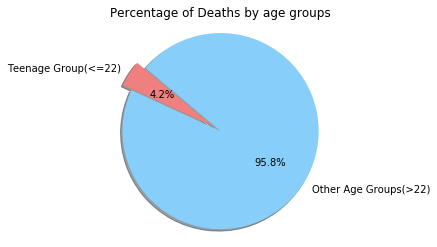

In [26]:
# PLotting a pie graph
labels = 'Teenage Group(<=22)', 'Other Age Groups(>22)'
sizes = [Teenager, NotATeenager]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode 1st slice


plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Deaths by age groups')
plt.axis('equal')
plt.show()

The above pie chart depicts that only 4.2 percent of the deaths are in teenage group. This means that most of the people are prone to drungs with age greater than 23.